Imports

In [1]:
#imported all libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

Reading CSV File

In [2]:
df = pd.read_csv('insurance_data.csv')
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


<AxesSubplot:xlabel='age', ylabel='bought_insurance'>

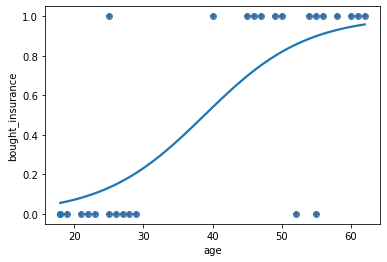

In [3]:
%matplotlib inline
plt.xlabel('Age')
plt.ylabel('Insurance')
plt.scatter(df.age,df.bought_insurance,color="red",marker="+")
sns.regplot(x=df['age'], y=df['bought_insurance'], logistic=True, ci=None)

In [4]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df[['age']],df.bought_insurance,test_size=0.1)


In [8]:
Y_test

7     1
10    0
6     0
Name: bought_insurance, dtype: int64

In [9]:
X_test

,age
7,60
10,18
6,55


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [12]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [13]:
model.score(X_test, Y_test)

0.6666666666666666

In [14]:
model.predict_proba(X_test)

array([[0.017813  , 0.982187  ],
       [0.95896384, 0.04103616],
       [0.04080369, 0.95919631]])

In [15]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.6666666666666666
